# Tarea Grupal : Control de versiones

## Paso 1

In [4]:
import pandas as pd

def converir_a_df():        
    url = 'https://raw.githubusercontent.com/LaChicaFrancesa/TareaGrupalAnalisisDeDatos/main/Grupo_1_data_CO2_short.csv'
    
    df = pd.read_csv(url, header=0, sep=',', encoding='latin')
    return df


df = converir_a_df()
print(df)



CO2 = list(df.iloc[:, -1]) # Creamos una lista que contenga los valores de la última columna


for i, valor in enumerate(reversed(CO2)): # Recorremos de forma inversa la lista y buscamos el primer valor negativo, lo almacenamos
    indx = 0
    if(valor < 0):
        indx = len(CO2) + 1 - i
        break

indx = 0
sum = 0
for i, valor in enumerate(reversed(CO2)):
    
    elem = int( valor > 0) # entrega 1 si el valor de co2 es mayor a cero, y 0 cuando el valor de co2 es menos a cero
    sum +=elem
    if(elem == 0):
        print(sum/(i+1)) # muestra la cantidad de valores positivos dividido en el total de elementos recorridos

    if(sum/(i+1) <= 0.95):
        indx = len(CO2) + 1 - i # muestra el indice donde el intervalo tiene un 95%, o menos de valores validos
        break # cuando se cumpla esa condicion sale del loop y se obtiene el indice a tomar para armar el intervalo

    
print(indx) # indice desde el cual tomar el  intervalo
print(sum)  # elementos con valor válido
print(len(CO2)) # total de elementos

# El intervalo ha utilizar es toda la base de datos 

       Yr   Mn        Date       CO2
0    1958    3   1958.2027    315.71
1    1958    4   1958.2877    317.45
2    1958    5   1958.3699    317.51
3    1958    6   1958.4548    -99.99
4    1958    7   1958.5370    315.86
..    ...  ...         ...       ...
746  2020    5   2020.3716    417.15
747  2020    6   2020.4563    416.29
748  2020    7   2020.5383    414.42
749  2020    8   2020.6230    412.52
750  2020    9   2020.7077    411.18

[751 rows x 4 columns]
0.9985250737463127
0.9970544918998527
0.9955882352941177
0.9946236559139785
0.9933155080213903
0
746
751


## Paso 2

In [6]:
# Creando la nueva base de datos

nuevos_datos = pd.concat([df.iloc[:,-2],df.iloc[:,-1]], axis= 1) #Primer elemento corresponde al date y el otro co2
#Con axis = 1, indica que se desea unir por fila (con axis=0 se une por columna)


print(nuevos_datos)
# Encontrando los intervalos no validos, segun las condiciones dadas
intervalos_no_validos = []

for i,valor in enumerate(CO2):
    if valor < 0:
       intervalos_no_validos.append(i) 

print(intervalos_no_validos)

data_frame = nuevos_datos
idx = intervalos_no_validos
datos_corregidos = []
intervalo_negativo = []
contador = 0

for i in idx:
    if data_frame.iloc[i-1,1]>0 and data_frame.iloc[i+1,1]>0:
    
        a = ((data_frame.iloc[i+1,0]-data_frame.iloc[i-1,0]))
        
        valor_recta = (1/a)*(((data_frame.iloc[i,0]-data_frame.iloc[i-1,0])*data_frame.iloc[i-1,1])-\
        (data_frame.iloc[i,0]-data_frame.iloc[i+1,0])*data_frame.iloc[i+1,1])

        datos_corregidos.append(valor_recta)
        
    elif data_frame.iloc[i,1]<0:
        intervalo_negativo.append(i)

print(intervalo_negativo)

#Actualizando los intervalos no validos medinate una recta
for i in intervalo_negativo:
    a = ((data_frame.iloc[intervalo_negativo[len(intervalo_negativo)-1]+1,0]-data_frame.iloc[intervalo_negativo[0]-1,0]))

    valor_recta = (1/a)*(((data_frame.iloc[i,0]-data_frame.iloc[intervalo_negativo[0]-1,0])*data_frame.iloc[intervalo_negativo[0]-1,1])-\
    (data_frame.iloc[i,0]-data_frame.iloc[intervalo_negativo[len(intervalo_negativo)-1]+1,0])*data_frame.iloc[intervalo_negativo[len(intervalo_negativo)-1]+1,1])
    
    datos_corregidos.append(valor_recta)


print(datos_corregidos)

#Creanndo CO2_completo
contador = 0
for valor in intervalos_no_validos:
    nuevos_datos.iloc[valor,1] = datos_corregidos[contador]
    contador +=1
CO2_completo = nuevos_datos
print(CO2_completo)

           Date       CO2
0     1958.2027    315.71
1     1958.2877    317.45
2     1958.3699    317.51
3     1958.4548    -99.99
4     1958.5370    315.86
..          ...       ...
746   2020.3716    417.15
747   2020.4563    416.29
748   2020.5383    414.42
749   2020.6230    412.52
750   2020.7077    411.18

[751 rows x 2 columns]
[3, 7, 71, 72, 73]
[71, 72, 73]
[316.69833034111315, 313.27100478468896, 321.5633817301866, 320.9213490623108, 320.2347307924975]
           Date        CO2
0     1958.2027  315.71000
1     1958.2877  317.45000
2     1958.3699  317.51000
3     1958.4548  316.69833
4     1958.5370  315.86000
..          ...        ...
746   2020.3716  417.15000
747   2020.4563  416.29000
748   2020.5383  414.42000
749   2020.6230  412.52000
750   2020.7077  411.18000

[751 rows x 2 columns]


## Paso 3


------ Parámetros n = 4 -------

 theta0 = -114899.23842477045
 theta1 = 35555.87947773606
 theta2 = -2493.739924438568
 theta3 = 60.87644145719067
 theta4 = -0.47984543437249383

 Valor óptimo de ECM = 1245807428.9923902
Tiempo que tarda la ejecución:0.0634765625 segundos 




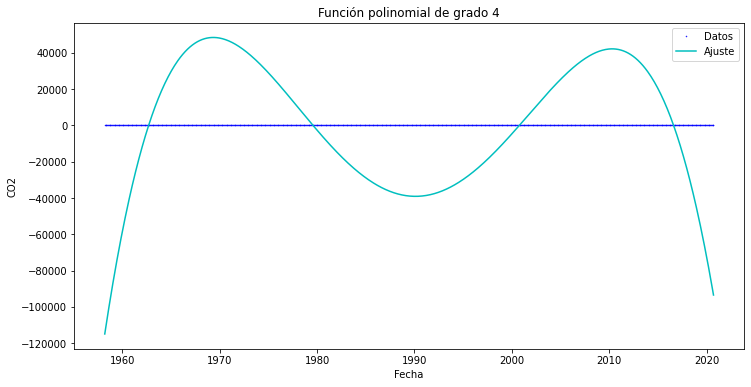


------ Parámetros n = 3 -------

 theta0 = 314.2665398264252
 theta1 = 0.8369808009770963
 theta2 = 0.009735527206585815
 theta3 = 3.7769057501038236e-05

 Valor óptimo de ECM = 4.914193309620108
Tiempo que tarda la ejecución:0.04610252380371094 segundos 




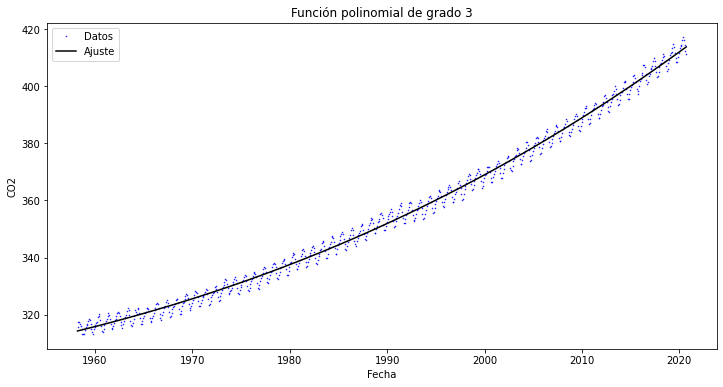


------ Parámetros n = 2 -------

 theta0 = 314.7259531876581
 theta1 = 0.7484968344878807
  theta2 = 0.013276751318188597

 Valor óptimo de ECM = 4.944804102766586
Tiempo que tarda la ejecución:0.04287433624267578 segundos 




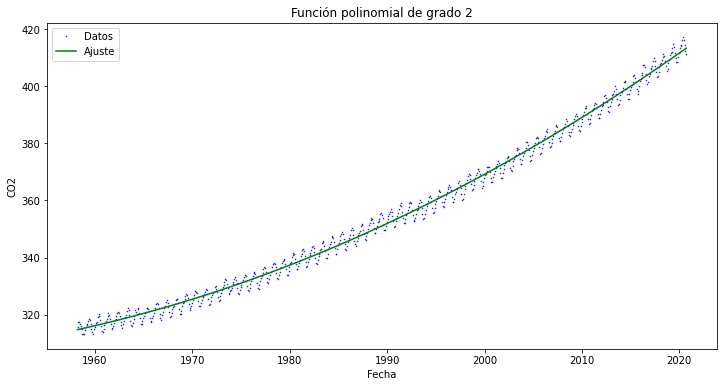


------ Parámetros n = 1 -------

 theta0 = 306.09120353063366
 theta1 = 1.578375101716739
  
 Valor óptimo de ECM = 19.96746842230805
Tiempo que tarda la ejecución:0.009972810745239258 segundos 




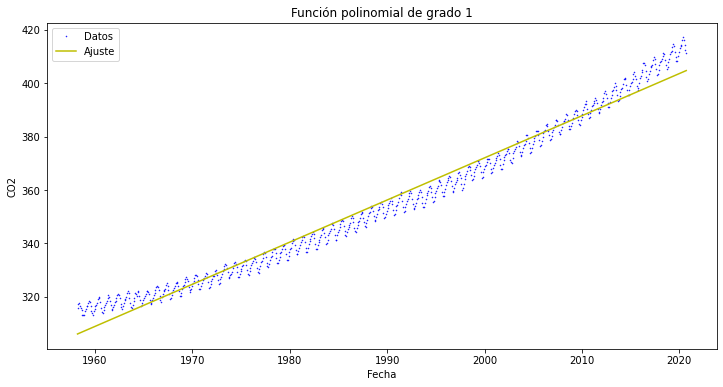


------ Parámetros n = 0 -------

 theta0 = 355.420371222517
  
 Valor óptimo de ECM = 833.0923626920456
Tiempo que tarda la ejecución:0.004984855651855469 segundos 




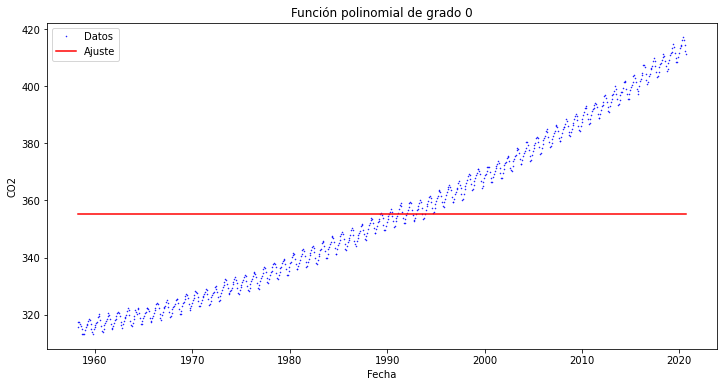

In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time


#datos
x = CO2_completo.iloc[:,0].values # fechas
y = CO2_completo.iloc[:,1].values  # CO2

n = 5
def poli_fuc(theta, t): #Funcion polinomial
    T = 1958.2027
    f_theta = 0
    for i in range(n+1):
        f_theta += theta[i]*(t - T)**i

    return np.array(f_theta)


def ECM(theta, t , y): # Error cuadratico medio
    f_theta = poli_fuc(theta, t )
    error = ((y - f_theta)**2).sum()
    return error/len(t)

# Caso n = 4
n = 4
inicio = time.time()

#   optimización

# valores iniciales para theta
#theta =(100,-0.2,0.3,0.04, 0.01)
theta =(300,2,0.03,0.004, -2)
#theta =(0.1,0.2,0.3,0.2, 0.1)

res = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell')
fin = time.time()
print()
print(f'------ Parámetros n = {n} -------')
print(f'\n theta0 = {res.x[0]}\n theta1 = {res.x[1]}\n theta2 = {res.x[2]}\n theta3 = {res.x[3]}\n theta4 = {res.x[4]}\n') # valores de los thetas
print(f' Valor óptimo de ECM = {res.fun}')
print(f'Tiempo que tarda la ejecución:{fin-inicio} segundos \n\n')
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(x,y,'b.',markersize=1,label='Datos')
plt.plot(x,poli_fuc(res.x,x), 'c', label = 'Ajuste')
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.legend()
plt.title(f'Función polinomial de grado {n}')
plt.show()

# Caso n = 3
n = 3
inicio = time.time()
#   optimización

# valores iniciales para theta
theta =(0.1,0.2,0.3,0.1)

res = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell')
fin = time.time()
print()
print(f'------ Parámetros n = {n} -------')
print(f'\n theta0 = {res.x[0]}\n theta1 = {res.x[1]}\n theta2 = {res.x[2]}\n theta3 = {res.x[3]}\n') # valores de los thetas
print(f' Valor óptimo de ECM = {res.fun}')
print(f'Tiempo que tarda la ejecución:{fin-inicio} segundos \n\n')
plt.plot(x,y,'b.',markersize=1,label='Datos')
plt.plot(x,poli_fuc(res.x,x), 'k', label = 'Ajuste')
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.legend()
plt.title(f'Función polinomial de grado {n}')
plt.show()

# Caso n = 2
n = 2
inicio = time.time()
#   optimización

# valores iniciales para theta
theta =(0.1,0.2,0.1)

res = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell')
fin = time.time()
print()
print(f'------ Parámetros n = {n} -------')
print(f'\n theta0 = {res.x[0]}\n theta1 = {res.x[1]}\n  theta2 = {res.x[2]}\n') # valores de los thetas
print(f' Valor óptimo de ECM = {res.fun}')
print(f'Tiempo que tarda la ejecución:{fin-inicio} segundos \n\n')
plt.plot(x,y,'b.',markersize=1,label='Datos')
plt.plot(x,poli_fuc(res.x,x), 'g', label = 'Ajuste')
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.legend()
plt.title(f'Función polinomial de grado {n}')
plt.show()

# Caso n = 1
n = 1
inicio = time.time()
#   optimización

# valores iniciales para theta
theta =(0.1,0.1)

res = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell')
fin = time.time()
print()
print(f'------ Parámetros n = {n} -------')
print(f'\n theta0 = {res.x[0]}\n theta1 = {res.x[1]}\n  ') # valores de los thetas
print(f' Valor óptimo de ECM = {res.fun}')
print(f'Tiempo que tarda la ejecución:{fin-inicio} segundos \n\n')
plt.plot(x,y,'b.',markersize=1,label='Datos')
plt.plot(x,poli_fuc(res.x,x), 'y', label = 'Ajuste')
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.legend()
plt.title(f'Función polinomial de grado {n}')
plt.show()

# Caso n = 1
n = 0
inicio = time.time()
#   optimización

# valores iniciales para theta
theta =(0.1,0.1)

res = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell')
fin = time.time()
print()
print(f'------ Parámetros n = {n} -------')
print(f'\n theta0 = {res.x[0]}\n  ') # valores de los thetas
print(f' Valor óptimo de ECM = {res.fun}')
print(f'Tiempo que tarda la ejecución:{fin-inicio} segundos \n\n')
plt.plot(x,y,'b.',markersize=1,label='Datos')
plt.plot(x,poli_fuc(res.x,x), 'r', label = 'Ajuste')
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.legend()
plt.title(f'Función polinomial de grado {n}')
plt.show()

## Paso 4

In [8]:
## tomando la funcion polinomial de grado 3, que tiene menor error cuarático medio
n = 3
theta =(0.1,0.2,0.3,0.1)
res = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell') # para obtener los theta

co2_centrada = y - poli_fuc(res.x,x)

CO2_completo.insert(2,"CO2_centrado",co2_centrada) # Ejecutar una sola vez

print(CO2_completo)

media = CO2_completo.iloc[:,1].mean()
std = CO2_completo.iloc[:,1].std()
print(f' Media : {media}\n Desviación estandar : {std}')

           Date        CO2  CO2_centrado
0     1958.2027  315.71000      1.443460
1     1958.2877  317.45000      3.112246
2     1958.3699  317.51000      3.103245
3     1958.4548  316.69833      2.220168
4     1958.5370  315.86000      1.312568
..          ...        ...           ...
746   2020.3716  417.15000      4.146554
747   2020.4563  416.29000      3.075920
748   2020.5383  414.42000      1.001770
749   2020.6230  412.52000     -1.109338
750   2020.7077  411.18000     -2.660687

[751 rows x 3 columns]
 Media : 355.42037123396915
 Desviación estandar : 28.882575240254607


## Paso 5

C:\Users\acer\AppData\Local\Temp\ipykernel_16588\1349262769.py:3: RuntimeWarning: overflow encountered in exp
  fBeta = betas[0]*np.sin(betas[1]*(t-T) + betas[2])*np.exp(betas[3]*t)
c:\Users\acer\anaconda3\envs\herramientas_ent\lib\site-packages\scipy\optimize\_optimize.py:2782: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\acer\anaconda3\envs\herramientas_ent\lib\site-packages\scipy\optimize\_optimize.py:3230: RuntimeWarning: overflow encountered in double_scalars
  t -= delta*temp*temp


Valores obtimales de beta = [ -0.72360679   2.37745419   2.50073109 -27.46230571]

Tiempo de optimización: 0.0139617919921875(s)


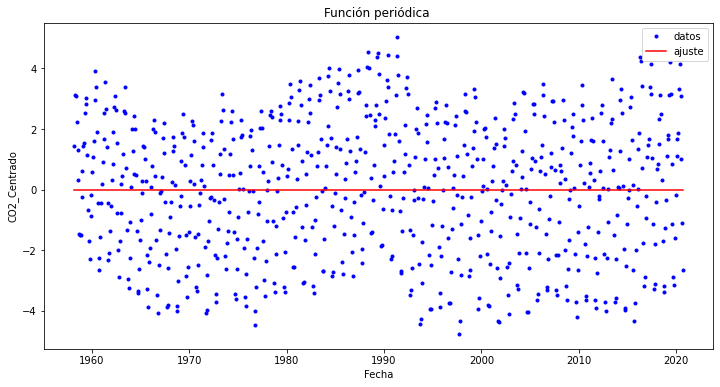

In [9]:
def f_beta(betas,t):
    T = 1958.2027 # Fecha inicial
    fBeta = betas[0]*np.sin(betas[1]*(t-T) + betas[2])*np.exp(betas[3]*t)
    return fBeta

def ECM_b(betas, t , y): # Error cuadratico medio
    fBeta = f_beta(betas, t )
    error = ((y - fBeta)**2).sum()
    return error/len(t)

inicio = time.time()
# valores iniciales betas
betas = (0.1,0.1,0.1,0.1)

res = minimize(ECM_b,betas, args=(x,co2_centrada), tol= 1e-3, method='Powell') # Minimiza el ECM
fin = time.time()
betas = res.x # valores obtimales de beta
print(f'Valores obtimales de beta = {betas}\n')
print(f'Tiempo de optimización: {fin - inicio}(s)')


plt.plot(x,co2_centrada,'b.',label='datos') # datos 
plt.plot(x,f_beta(betas,x), 'r', label = 'ajuste') # ajuste
plt.xlabel('Fecha')
plt.ylabel('CO2_Centrado')
plt.legend()
plt.title(f'Función periódica ')
plt.show()

## Paso 6

4.914193309620108


C:\Users\acer\AppData\Local\Temp\ipykernel_16588\1349262769.py:3: RuntimeWarning: overflow encountered in exp
  fBeta = betas[0]*np.sin(betas[1]*(t-T) + betas[2])*np.exp(betas[3]*t)
c:\Users\acer\anaconda3\envs\herramientas_ent\lib\site-packages\scipy\optimize\_optimize.py:2782: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\acer\anaconda3\envs\herramientas_ent\lib\site-packages\scipy\optimize\_optimize.py:3230: RuntimeWarning: overflow encountered in double_scalars
  t -= delta*temp*temp


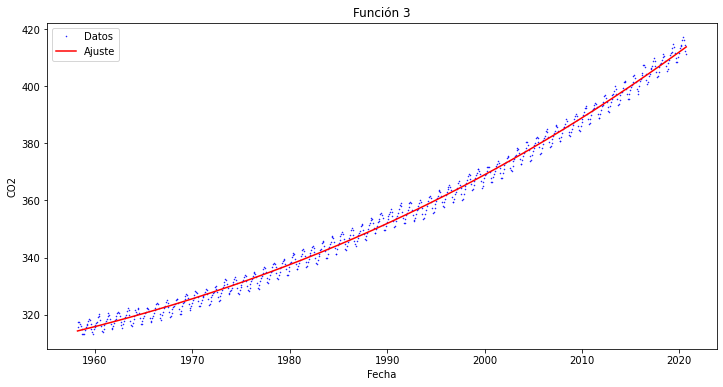

Index(['31-10-2020', '30-11-2020', '31-12-2020', '31-01-2021', '28-02-2021',
       '31-03-2021', '30-04-2021', '31-05-2021', '30-06-2021', '31-07-2021',
       '31-08-2021', '30-09-2021', '31-10-2021', '30-11-2021', '31-12-2021',
       '31-01-2022', '28-02-2022', '31-03-2022'],
      dtype='object')
414.1477881687221
414.3528874706667
414.5650611547878
414.778040119991
414.97063422831826
415.18409501147227
415.3909018078269
415.60484187226484
415.81211274932963
416.02653263261624
416.2411965642793
416.44916835031296
416.66431291157687
416.87275008314174
417.088375811571
417.30424627358605
417.49943651494806
417.7157731438025


In [11]:
# Parte 6

#theta
n = 3
theta =(0.1,0.2,0.3,0.1)
res_theta = minimize(ECM,theta, args=(x,y), tol= 1e-3, method='Powell')

Funcion_tetha = poli_fuc(res_theta.x,x)

#beta
betas = (0.1,0.1,0.1,0.1)

res_beta = minimize(ECM_b,betas, args=(x,co2_centrada), tol= 1e-3, method='Powell') # Minimiza el ECM
betas = res_beta.x # valores obtimales de beta
Funcion_beta=f_beta(betas,x)

Funcion = Funcion_tetha + Funcion_beta

# Error cuadratico medio
error = ((y - Funcion)**2).sum()

print(error/len(x)) #Error cuadratico medio entre CO2_completo y la Funcion.

plt.plot(x,y,'b.',markersize=1,label='Datos')
plt.plot(x,Funcion, 'r', label = 'Ajuste')
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.legend()
plt.title(f'Función {n}')
plt.show()

#Creamos el nuevo rango de fechas (REVISAR, quizas me equivoque en los extremos por que dice entre tales meses, no se si se debian considerar)
import datetime
Comienzo = datetime.datetime.strptime("01-10-2020", "%d-%m-%Y")
final = datetime.datetime.strptime("31-03-2022", "%d-%m-%Y")
Nuevas_fechas = pd.date_range(Comienzo, final,freq='M')
print (Nuevas_fechas.strftime("%d-%m-%Y"))
#Funcion para transofmrar la fechasa variable continua o 'año decimal' (como lo entrega el profe)
def año_decimal(fecha):
    inicio = datetime.date(fecha.year, 1, 1).toordinal()
    largo_año = datetime.date(fecha.year+1, 1, 1).toordinal() - inicio
    return fecha.year + float(fecha.toordinal() - inicio) / largo_año

Nuevas_fechas_decimal = []

for date in Nuevas_fechas:
    Nuevas_fechas_decimal.append(año_decimal(date)) #Fechas decimales

Nuevas_fechas_decimal = np.array(Nuevas_fechas_decimal)

Funcion_nuevas_fechas = poli_fuc(res_theta.x, Nuevas_fechas_decimal) + f_beta(betas,Nuevas_fechas_decimal) #Predicción para las nuevas fechas

for CO2 in Funcion_nuevas_fechas:
    print(CO2)